# Netflix Movies and TV Shows Clustering 

# Import Libraries & Load Dataset

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns,os
# NLP
from sklearn.feature_extraction.text import TfidfVectorizer
# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Clustering Models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Evaluation Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Warnings
import warnings
warnings.filterwarnings('ignore')
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 2. Load Dataset

In [2]:
# Load the CSV file
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Display first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Exploratory Data Analysis (EDA)

## 3. Basic Information

In [4]:
print(f"Dataset Shape: {df.shape}")
print("\n--- Dataset Info ---")
df.info()

Dataset Shape: (7787, 12)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Understanding Dataset Columns


In [5]:
# Dataset Columns
print("Columns in the dataset:")
print(df.columns)

# Identifying Numerical and Categorical columns
numerical_columns = ['release_year', 'date_added', 'duration']
categorical_columns = ['type', 'director', 'cast', 'country', 'listed_in']

print(f'Numerical Columns: {numerical_columns}')
print(f'Categorical Columns: {categorical_columns}')


print('\nSummary of Data Set:')
display(df.describe(include='all'))

print('\nSummary of Numerical Data:')
display(df[numerical_columns].describe())
display(df[['date_added', 'duration']].describe())

print('\nSummary of Categorical Data:')
display(df[categorical_columns].describe())


Columns in the dataset:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Numerical Columns: ['release_year', 'date_added', 'duration']
Categorical Columns: ['type', 'director', 'cast', 'country', 'listed_in']

Summary of Data Set:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN



Summary of Numerical Data:


,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


,date_added,duration
count,7777,7787
unique,1565,216
top,"January 1, 2020",1 Season
freq,118,1608



Summary of Categorical Data:


,type,director,cast,country,listed_in
count,7787,5398,7069,7280,7787
unique,2,4049,6831,681,492
top,Movie,"Raúl Campos, Jan Suter",David Attenborough,United States,Documentaries
freq,5377,18,18,2555,334


### Data Set Explanation:

**show_id**: Unique identifier for each title

**type**: Indicates whether the entry is a "Movie" or "TV Show"

**title**: Name of the movie/TV show

**director**: Name of the director(s) (contains missing values)

**cast**: Main actors in the content (contains missing values)

**country**: Country where the content was produced (contains missing 
values)

**date_added**: Date when the content was added to Netflix

**release_year**: Year the content was released

**rating**: Content rating (e.g., TV-MA, PG-13)

**duration**: Movie runtime or number of TV show seasons

**listed_in**: Genre classification (e.g., Drama, Comedy, Horror)

**description**: Short synopsis of the content


## duration Columns Values Analysis

In [6]:
# Assuming 'df' is your DataFrame and 'type' is the column for Movie/TV Show
# and 'duration' is the column with durations.

# Check for rows where the duration is given in seasons
season_rows = df[df['duration'].str.contains('Season')]

# Now count how many of these are TV Shows and how many are Movies
tv_shows_with_seasons = season_rows[season_rows['type'] == 'TV Show']
movies_with_seasons = season_rows[season_rows['type'] == 'Movie']

# Print counts
print("TV Shows with seasons as duration:", len(tv_shows_with_seasons))
print("Movies with seasons as duration:", len(movies_with_seasons))


TV Shows with seasons as duration: 2410
Movies with seasons as duration: 0


## 4. Missing Values Analysis

Missing Values Summary:
            Missing Count  Current Records  Total Records  Percentage (%)
director             2389             5398           7787       30.679337
cast                  718             7069           7787        9.220496
country               507             7280           7787        6.510851
date_added             10             7777           7787        0.128419
rating                  7             7780           7787        0.089893


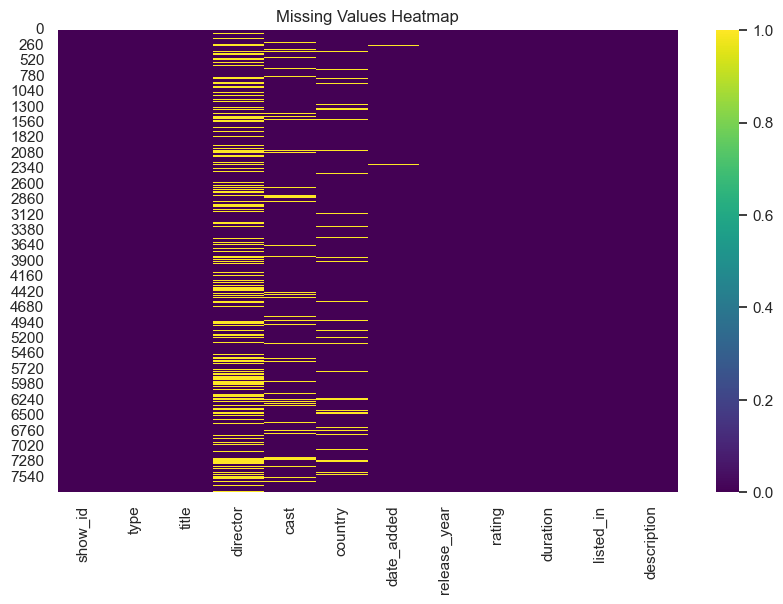

In [7]:
# Calculate missing values, total values, and percentage
missing_count = df.isnull().sum()
total_count = len(df)
current_records = df.count()
missing_percentage = (missing_count / total_count) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Current Records': current_records, 'Total Records': total_count, 'Percentage (%)': missing_percentage})

# Filter to show only columns with missing values
print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 5. Duplicate Records Check

In [8]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [9]:
duplicates = df[['title']].duplicated().sum()
print(f"Number of duplicate title records: {duplicates}")

Number of duplicate title records: 0


### Existing Pattern

In [10]:
duplicates = df[['cast','director','release_year','rating']].duplicated().sum()
print(f"Existing Pattern Records: {duplicates}")

Existing Pattern Records: 278


In [11]:
duplicate_groups = (
    df.groupby(['cast', 'director', 'release_year', 'rating'])['title']
    .apply(list)
    .reset_index()
)
duplicate_groups = duplicate_groups[duplicate_groups['title'].str.len() > 1]
print(duplicate_groups)

                                                   cast             director  \
218   Alden Ehrenreich, Woody Harrelson, Emilia Clar...           Ron Howard   
271   Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...   Trivikram Srinivas   
972                                       Craig Sechler        Oliver Twinch   
1067                                     Dave Chappelle          Stan Lathan   
1500  G.V. Prakash Kumar, Nedumudi Venu, Aparna Bala...          Rajiv Menon   
2004  Jeannie Elias, Kat Feller, Sandy Fox, Cindy Ro...           Ron Myrick   
3344  Nawazuddin Siddiqui, Amrita Rao, Rajeev Panday...        Abhijit Panse   
3352  Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...       Sekhar Kammula   
3358  Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...         Ozan Açıktan   
3633  Prabhas, Rana Daggubati, Anushka Shetty, Taman...       S.S. Rajamouli   
3635  Prabhas, Rana Daggubati, Anushka Shetty, Taman...       S.S. Rajamouli   
3682                                   R

In [12]:
duplicate_groups = (
    df.groupby(['cast', 'director'])['title']
    .agg(title_list=list, count='count')
    .reset_index()
)

duplicate_groups = duplicate_groups[duplicate_groups['count'] > 1]

duplicate_groups


,cast,director,title_list,count
218,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",Ron Howard,"[Solo: A Star Wars Story, Solo: A Star Wars St...",2
256,Ali Wong,Jay Karas,"[Ali Wong: Baby Cobra, Ali Wong: Hard Knock Wife]",2
270,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",Trivikram Srinivas,"[Ala Vaikunthapurramuloo, Angu Vaikuntapurathu...",2
329,Amy Schumer,Amy Schumer,"[Amy Schumer Growing, Amy Schumer: The Leather...",2
631,Bill Burr,Jay Karas,"[Bill Burr: I'm Sorry You Feel That Way, Bill ...",3
637,Bill Hicks,Chris Bould,"[Bill Hicks: Relentless, Bill Hicks: Revelations]",2
668,Bo Burnham,"Bo Burnham, Christopher Storer","[Bo Burnham: Make Happy, Bo Burnham: what.]",2
876,Chris D'Elia,Bill D'Elia,"[Chris D'Elia: Incorrigible, Chris D'Elia: Man...",2
965,Craig Sechler,Oliver Twinch,"[NOVA: Killer Hurricanes, NOVA: Killer Volcanoes]",2
984,D.L. Hughley,Jay Chapman,"[D.L. Hughley: Clear, D.L. Hughley: Contrarian]",2


## 6. Univariate Analysis

### Content Type Distribution (Movie vs TV Show)

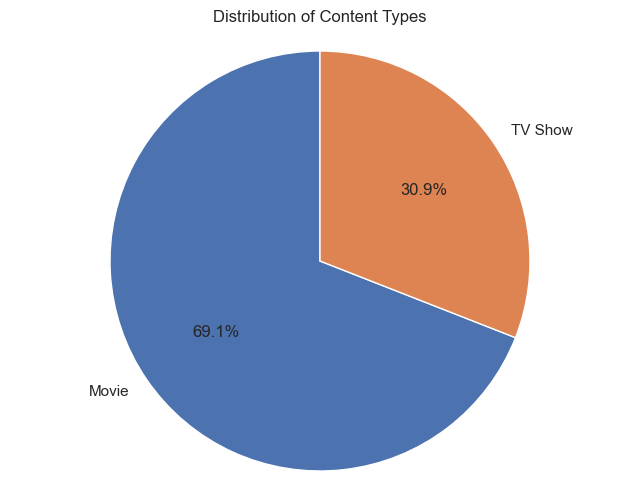

In [13]:
# Count values
type_counts = df['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Content Types')
plt.axis('equal')  # Makes the pie circular
plt.show()


### Rating Distribution

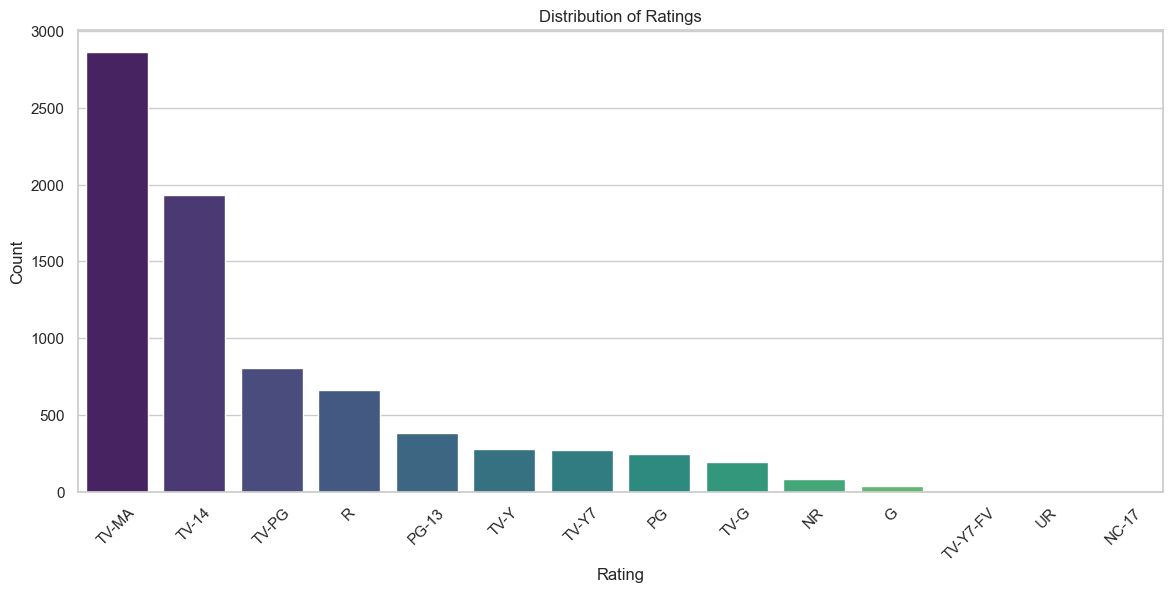

In [14]:
plt.figure(figsize=(14, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Release Year Distribution

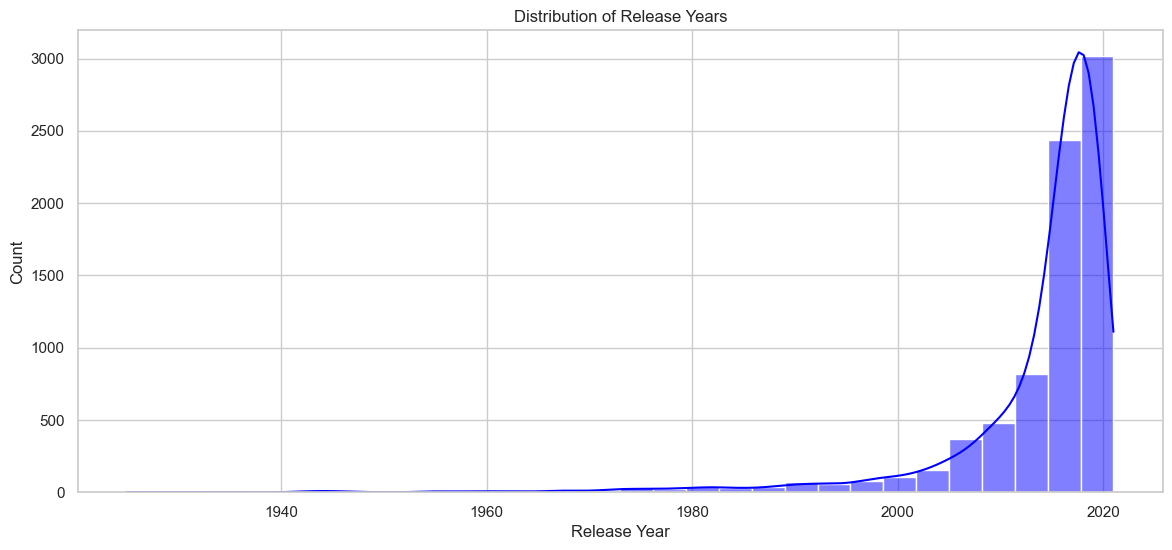

In [15]:
plt.figure(figsize=(14, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

## 7. Bivariate Analysis

### Content Type vs Release Year

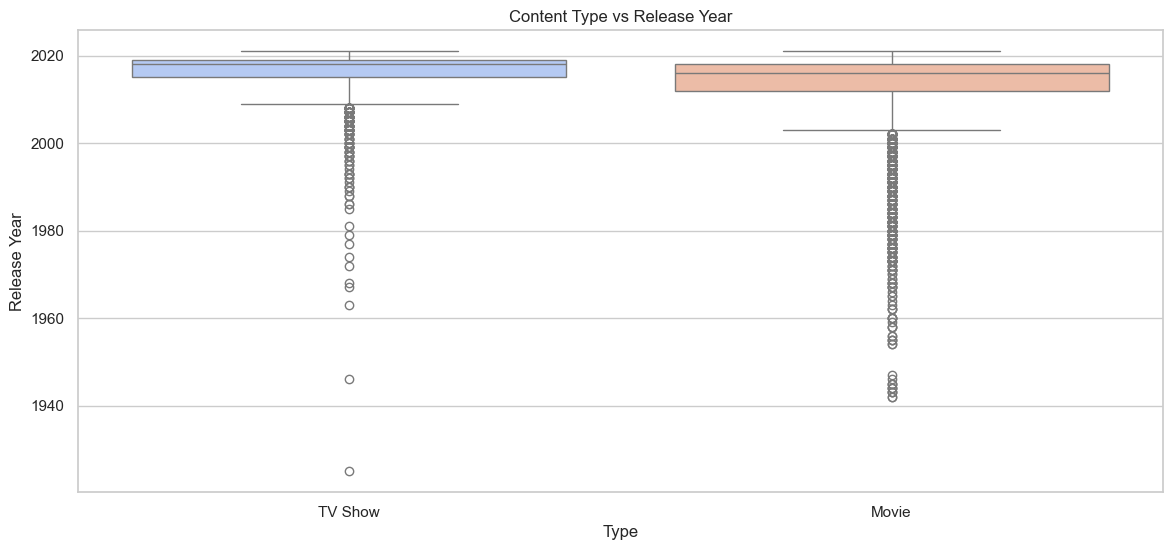

In [16]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='type', y='release_year', data=df, palette='coolwarm')
plt.title('Content Type vs Release Year')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

## 8. Genre Analysis

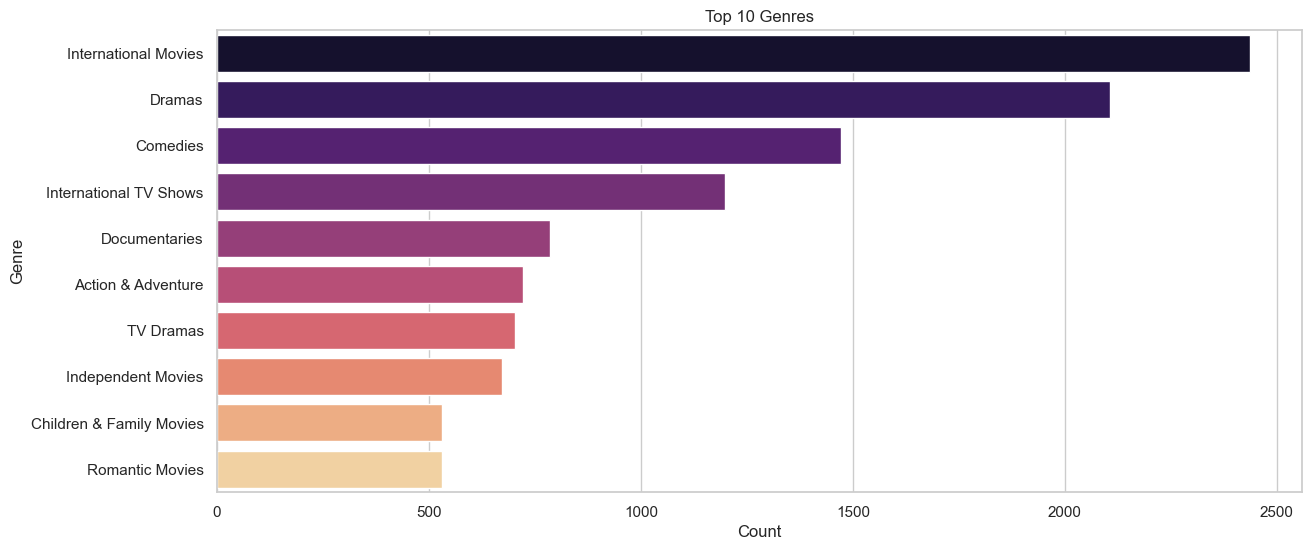

In [17]:
# Split the 'listed_in' column which contains comma-separated values
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(drop=True)

# Visualize Top 10 Genres
plt.figure(figsize=(14, 6))
sns.countplot(y=genres, order=genres.value_counts().index[:10], palette='magma')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## 9. Country-wise Analysis

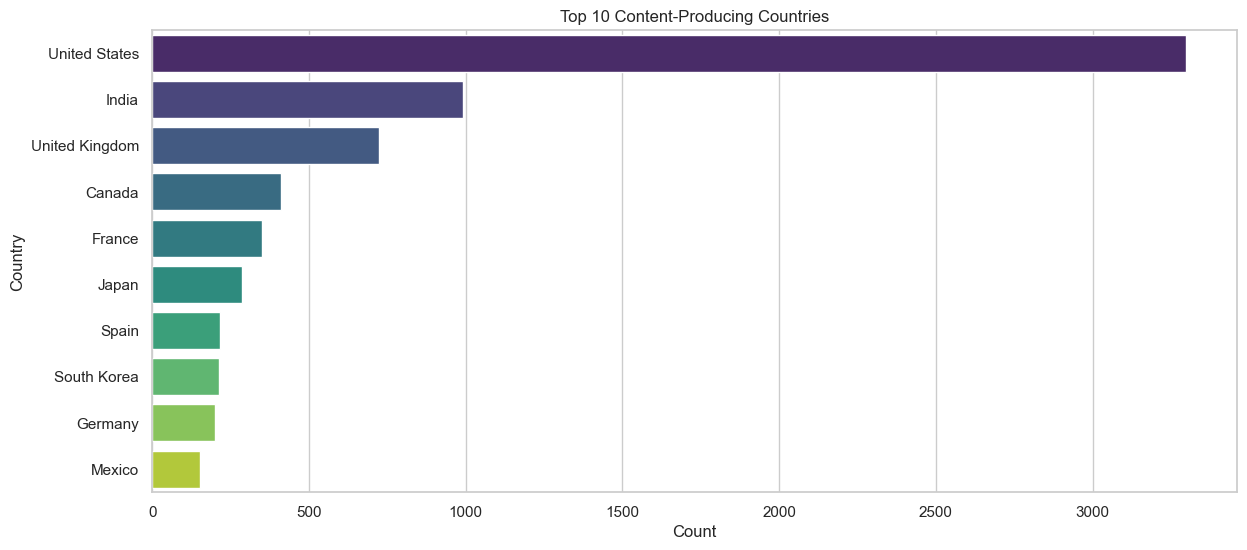

In [18]:
# Handle missing country values by filling with a placeholder or dropping (here we just take value_counts)
# Some entries might have multiple countries, we usually focus on the primary one or split. 
# For this simple analysis, we'll split them to count all occurrences.
countries = df['country'].dropna().str.split(', ', expand=True).stack().reset_index(drop=True)

# Top 10 Countries
plt.figure(figsize=(14, 6))
sns.countplot(y=countries, order=countries.value_counts().index[:10], palette='viridis')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

## 10. Duration Analysis

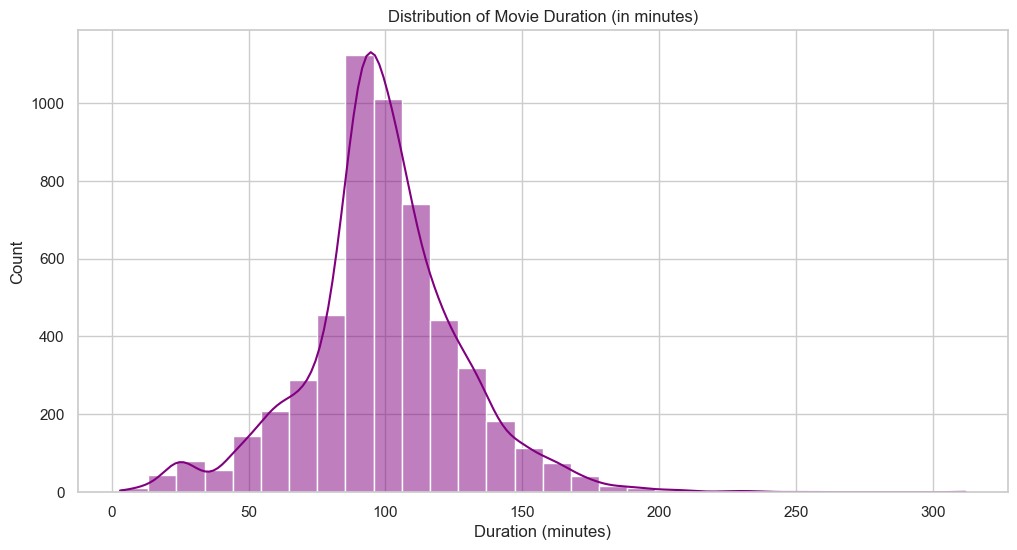

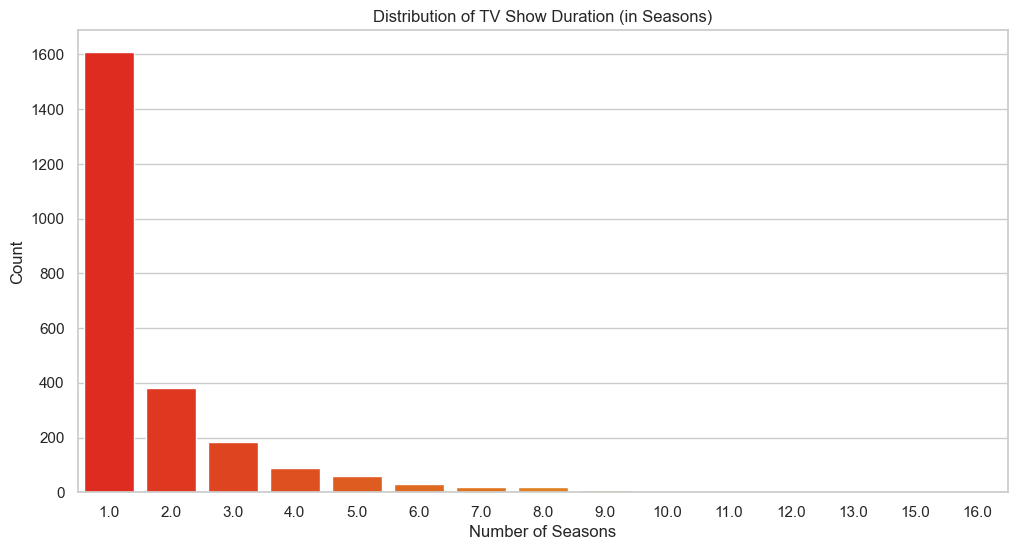

In [19]:
# Separate Movies and TV Shows for duration analysis
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Extract numeric duration
movies_df['duration_num'] = movies_df['duration'].str.replace(' min', '').astype(float)
tv_shows_df['duration_num'] = tv_shows_df['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)

# Plot Movie Duration Distribution
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['duration_num'], bins=30, kde=True, color='purple')
plt.title('Distribution of Movie Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Plot TV Show Duration Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='duration_num', data=tv_shows_df, palette='autumn')
plt.title('Distribution of TV Show Duration (in Seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

# Data Preprocessing 

### Handle missing values .

Missing Values Summary:
            Missing Count  Current Records  Total Records  Percentage (%)
date_added             10             7777           7787        0.128419
rating                  7             7780           7787        0.089893


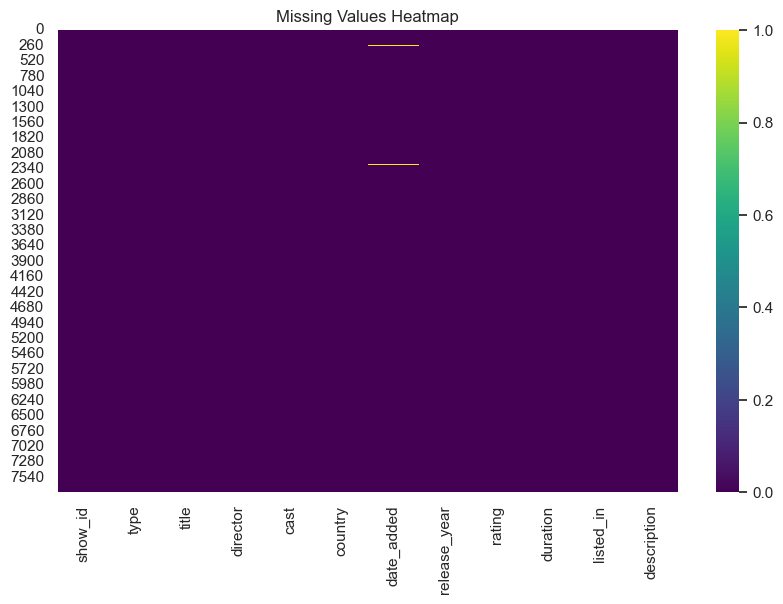

In [20]:
df[['director', 'cast','country']] = df[['director', 'cast','country']].fillna('Unknown')

# Calculate missing values, total values, and percentage
missing_count = df.isnull().sum()
total_count = len(df)
current_records = df.count()
missing_percentage = (missing_count / total_count) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Current Records': current_records, 'Total Records': total_count, 'Percentage (%)': missing_percentage})

# Filter to show only columns with missing values
print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency


In [22]:
le = LabelEncoder()
df['rating_encoded'] = le.fit_transform(df['rating'])


In [23]:
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cv_type = cramers_v(df['type'], df['rating'])


In [24]:
mi_director = mutual_info_score(
    df['director'].astype('category').cat.codes,
    df['rating'].astype('category').cat.codes
)

mi_cast = mutual_info_score(
    df['cast'].astype('category').cat.codes,
    df['rating'].astype('category').cat.codes
)

mi_genre = mutual_info_score(
    df['listed_in'].astype('category').cat.codes,
    df['rating'].astype('category').cat.codes
)


In [25]:
tfidf = TfidfVectorizer(
    max_features=300,
    stop_words='english'
)

X_desc = tfidf.fit_transform(df['description'])
y = df['rating_encoded']

mi_desc = mutual_info_classif(
    X_desc, y, discrete_features='auto'
)

mi_description = mi_desc.mean()
mi_description


np.float64(0.025897418379525097)

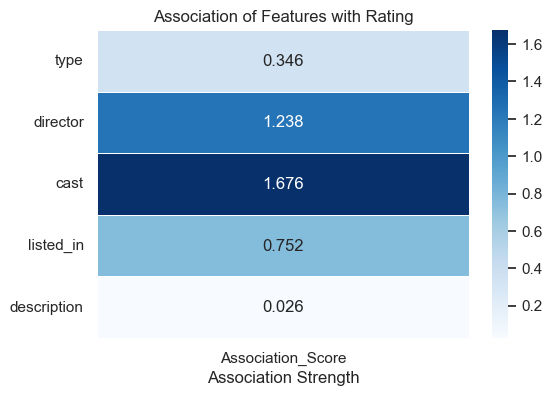

In [26]:
correlation_df = pd.DataFrame({
    'Feature': ['type', 'director', 'cast', 'listed_in', 'description'],
    'Association_Score': [
        cv_type,
        mi_director,
        mi_cast,
        mi_genre,
        mi_description
    ]
})

heatmap_data = correlation_df.set_index('Feature')

plt.figure(figsize=(6, 4))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='Blues',
    fmt='.3f',
    linewidths=0.5
)
plt.title('Association of Features with Rating')
plt.ylabel('')
plt.xlabel('Association Strength')
plt.show()



In [27]:
# Work on a copy for safety
df_clean = df.copy()

# Fill rating using exact genre match
for idx in df_clean[df_clean['rating'].isnull()].index:
    genre = df_clean.loc[idx, 'listed_in']
    
    # Get ratings for same genre
    genre_ratings = df_clean[
        (df_clean['listed_in'] == genre) &
        (df_clean['rating'].notnull())
    ]['rating']
    
    if not genre_ratings.empty:
        df_clean.loc[idx, 'rating'] = genre_ratings.mode()[0]


In [28]:
# Convert date_added to datetime
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

# Fill date_added based on release_year
for idx in df_clean[df_clean['date_added'].isnull()].index:
    year = df_clean.loc[idx, 'release_year']
    
    year_dates = df_clean[
        (df_clean['release_year'] == year) &
        (df_clean['date_added'].notnull())
    ]['date_added']
    
    if not year_dates.empty:
        df_clean.loc[idx, 'date_added'] = year_dates.mode()[0]
    else:
        # fallback: global most common date
        df_clean.loc[idx, 'date_added'] = df_clean['date_added'].mode()[0]


In [29]:

def convert_duration_to_minutes(value):
    if pd.isna(value):
        return np.nan
    
    value = value.strip()
    
    if 'min' in value:
        return int(value.replace(' min', ''))
    
    elif 'Season' in value:
        seasons = int(value.split(' ')[0])
        return seasons * 10 * 45   # 1 season ≈ 10 episodes × 45 min
    
    else:
        return np.nan
df_clean['duration_minutes'] = df_clean['duration'].apply(convert_duration_to_minutes)


## Encoding

Convert categorical data (type, rating, listed_in) into numerical format using one-hot encoding or label encoding.

In [30]:
type_encoder = LabelEncoder()
df_clean['type_encoded'] = type_encoder.fit_transform(df_clean['type'])

df_clean[['type', 'type_encoded']].head()

,type,type_encoded
0,TV Show,1
1,Movie,0
2,Movie,0
3,Movie,0
4,Movie,0


In [31]:
df_clean['genre_list'] = df_clean['listed_in'].str.split(', ')


mlb = MultiLabelBinarizer()

genre_encoded = pd.DataFrame(
    mlb.fit_transform(df_clean['genre_list']),
    columns=mlb.classes_,
    index=df_clean.index
)

df_clean = pd.concat([df_clean, genre_encoded], axis=1)
df_clean.filter(regex='type_|rating_|Drama|Comedy').head()

genre_columns = list(mlb.classes_)

# Feature Engineering

In [32]:
CURRENT_YEAR = 2025
df_clean['content_age'] = CURRENT_YEAR - df_clean['release_year']

df_clean['genre_count'] = df_clean['listed_in'].str.count(',') + 1

num_cols = [
    'duration_minutes',
    'release_year',
    'content_age',
    'genre_count'
]

scaler = StandardScaler()

df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])


In [33]:
df_clean[num_cols].describe()


,duration_minutes,release_year,content_age,genre_count
count,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03
mean,-2.189935e-17,1.003173e-14,-1.058469e-16,-2.171686e-16
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00
min,-6.079839e-01,-1.015579e+01,-8.070750e-01,-1.516781e+00
25%,-4.350561e-01,-1.064974e-01,-4.644853e-01,-2.445736e-01
50%,-3.961959e-01,3.502888e-01,-3.502888e-01,-2.445736e-01
75%,2.605411e-01,4.644853e-01,1.064974e-01,1.027634e+00
max,1.337585e+01,8.070750e-01,1.015579e+01,1.027634e+00


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=500,      # keep dimensionality reasonable
    stop_words='english',
    ngram_range=(1, 2)     # unigrams + bigrams (optional but useful)
)

X_tfidf = tfidf.fit_transform(df_clean['description'])
X_tfidf.shape


(7787, 500)

In [35]:
tfidf.get_feature_names_out()[:20]


array(['10', 'accident', 'action', 'actor', 'adventure', 'adventures',
       'age', 'agent', 'ambitious', 'america', 'american', 'amid',
       'ancient', 'angeles', 'animal', 'animated', 'apart', 'army', 'art',
       'artist'], dtype=object)

In [36]:
from scipy.sparse import hstack

# Select numeric + encoded categorical columns
base_feature_cols = [
    'duration_minutes',
    'release_year',
    'content_age',
    'genre_count',
    'type_encoded'
]

X_base = df_clean[base_feature_cols].values
X_final = hstack([X_base, X_tfidf])
X_final.shape


(7787, 505)

### 3.1 Find optimal number of components

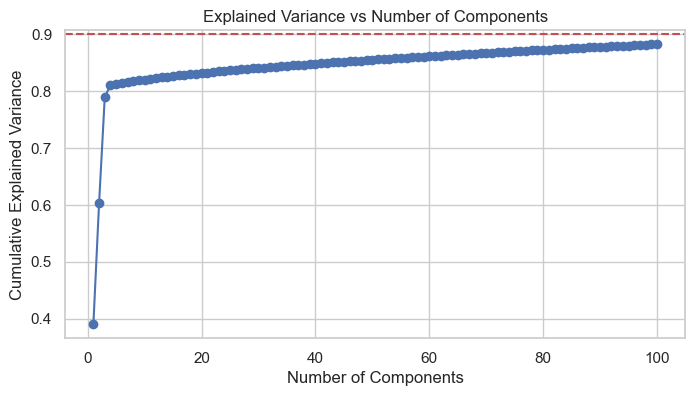

In [37]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=100, random_state=42)
X_svd_temp = svd.fit_transform(X_final)

explained_variance = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 101), explained_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()


In [38]:
svd_final = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd_final.fit_transform(X_final)

X_reduced.shape


(7787, 50)

### K-Means clustering (recommended first)

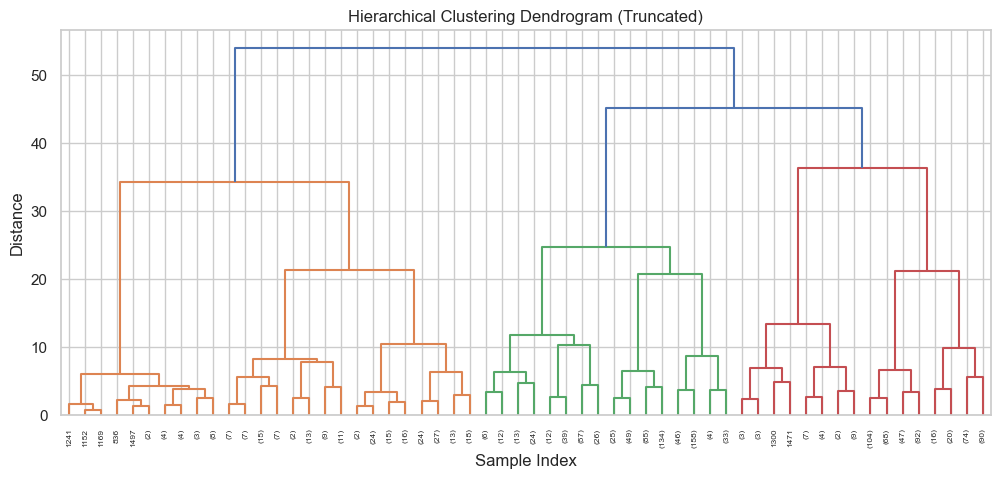

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use a subset for visualization (performance-safe)
X_sample = X_reduced[:1500]

linked = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 5))
dendrogram(
    linked,
    truncate_mode='level',
    p=5
)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [40]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(    n_clusters=5,    linkage='ward')
df_clean['hierarchical_cluster'] = hierarchical.fit_predict(X_reduced)
df_clean['hierarchical_cluster'].value_counts()

hierarchical_cluster
2    3561
1    2517
0    1271
3     287
4     151
Name: count, dtype: int64

In [41]:
df_clean.groupby('hierarchical_cluster')[    ['duration_minutes', 'content_age', 'genre_count']].mean()

,duration_minutes,content_age,genre_count
hierarchical_cluster,,,
0,-0.243918,1.093745,0.216864
1,-0.040823,-0.362085,1.027634
2,-0.189372,-0.332394,-0.821908
3,3.977307,-0.113142,-0.142620
4,-0.360025,4.883089,0.699050


### Compare Clustering Models

In [42]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_clean['kmeans_cluster'] = kmeans.fit_predict(X_reduced)

sil_kmeans = silhouette_score(X_reduced, df_clean['kmeans_cluster'])
db_kmeans = davies_bouldin_score(X_reduced, df_clean['kmeans_cluster'])

sil_kmeans, db_kmeans


(0.3497483076340344, 0.9284927127101769)

In [43]:
sil_hier = silhouette_score(X_reduced, df_clean['hierarchical_cluster'])
db_hier = davies_bouldin_score(X_reduced, df_clean['hierarchical_cluster'])

sil_hier, db_hier


(0.3251983159543892, 0.9378838306134554)

In [44]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
df_clean['dbscan_cluster'] = dbscan.fit_predict(X_reduced)
df_clean['dbscan_cluster'].value_counts()


dbscan_cluster
 0    7735
-1      38
 1      14
Name: count, dtype: int64

In [45]:
dbscan_mask = df_clean['dbscan_cluster'] != -1

sil_dbscan = silhouette_score(
    X_reduced[dbscan_mask],
    df_clean.loc[dbscan_mask, 'dbscan_cluster']
)

db_dbscan = davies_bouldin_score(
    X_reduced[dbscan_mask],
    df_clean.loc[dbscan_mask, 'dbscan_cluster']
)

sil_dbscan, db_dbscan


(0.7776489617314444, 0.21158746918820873)

In [46]:
comparison_df = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette_Score': [sil_kmeans, sil_hier, sil_dbscan],
    'Davies_Bouldin_Index': [db_kmeans, db_hier, db_dbscan]
})

comparison_df


,Model,Silhouette_Score,Davies_Bouldin_Index
0,K-Means,0.349748,0.928493
1,Hierarchical,0.325198,0.937884
2,DBSCAN,0.777649,0.211587


### Cluster Visualization (2D Projection)

#### Plot K-Means Clusters

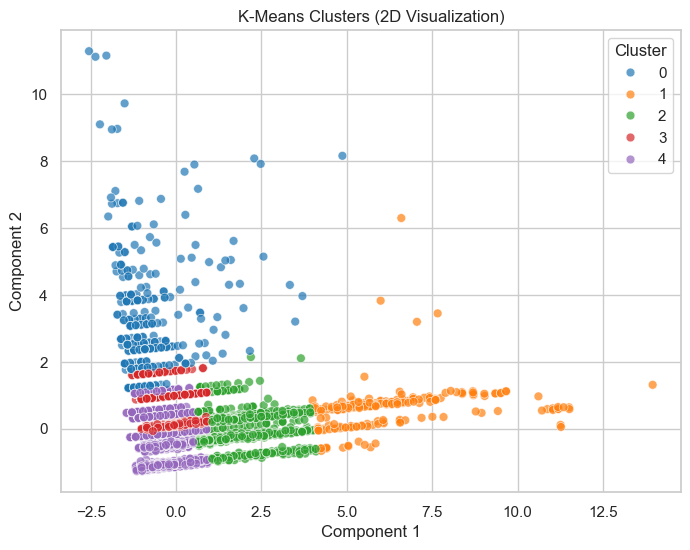

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

svd_2d = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd_2d.fit_transform(X_final)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_2d[:, 0],
    y=X_2d[:, 1],
    hue=df_clean['kmeans_cluster'],
    palette='tab10',
    s=40,
    alpha=0.7
)
plt.title('K-Means Clusters (2D Visualization)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()


#### Plot Hierarchical Clusters

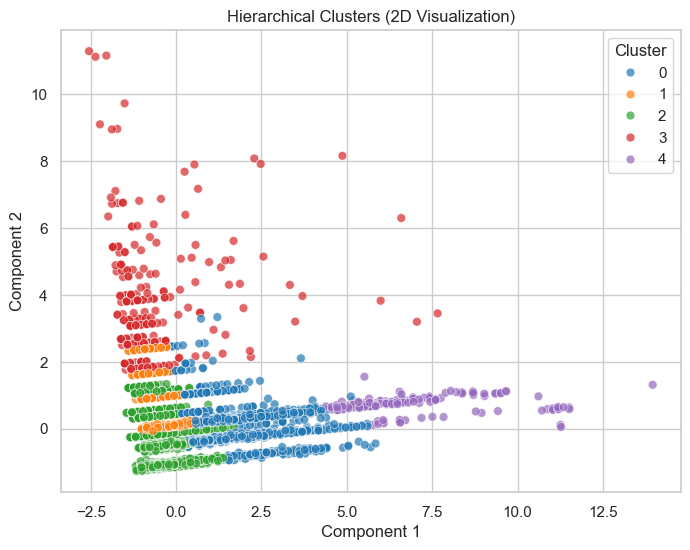

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_2d[:, 0],
    y=X_2d[:, 1],
    hue=df_clean['hierarchical_cluster'],
    palette='tab10',
    s=40,
    alpha=0.7
)
plt.title('Hierarchical Clusters (2D Visualization)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()


### create and save these .pkl files

In [49]:
import pickle

# Create the models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the K-Means model
with open('models/kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save the SVD model
with open('models/svd.pkl', 'wb') as f:
    pickle.dump(svd, f)

# Save the scaler
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the TF-IDF vectorizer
with open('models/tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the genre columns
with open('models/genre_columns.pkl', 'wb') as f:
    pickle.dump(genre_columns, f)


# encoding + k-means

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume df is your DataFrame with the relevant columns already selected
# If you have a DataFrame named df_clean, use that.

# Select only the columns you need for clustering
df_cluster = df[['listed_in', 'duration', 'rating']].copy()

# Convert duration to numeric (remove text and keep only numbers)
df_cluster['duration'] = df_cluster['duration'].str.extract('(\d+)').astype(float)

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['listed_in', 'rating']),
        ('num', StandardScaler(), ['duration'])
    ]
)

# Create the K-Means pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# Fit the pipeline to your data and get clusters
df['cluster'] = kmeans_pipeline.fit_predict(df_cluster)

# Now df['cluster'] contains the cluster labels
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2


In [4]:
kmeans_pipeline

,steps,"[('preprocessing', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
